# **CIÊNCIA DE DADOS** - DCA3501

UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE, NATAL/RN

DEPARTAMENTO DE ENGENHARIA DE COMPUTAÇÃO E AUTOMAÇÃO

(C) 2025-2026 CARLOS M D VIEGAS

https://github.com/cmdviegas

# Storytelling com Dados

Este notebook mostra como construir uma narrativa com dados, desde a primeira visualização até a conclusão.

Storytelling com dados é o processo de transformar análises e visualizações em histórias que comunicam significado.  
O objetivo é guiar o público na interpretação dos dados e destacar o que realmente importa.

Cada gráfico deve responder a uma pergunta e conduzir a um insight.  
A narrativa combina três elementos principais:

1. Mensagem – qual é a ideia central que queremos comunicar?  
2. Evidência – quais dados sustentam essa mensagem?  
3. Visualização – como mostrar isso de forma clara e envolvente?

Um bom storytelling direciona o olhar, destaca o essencial e provoca reflexão.  
Em vez de apenas informar, ele conecta dados, contexto e interpretação para gerar compreensão e impacto.


## Roteiro da História
1. Contexto e pergunta - Qual a história por trás dos dados?  
2. Exploração inicial - Compreender o comportamento geral.  
3. Comparação visual (frio vs. narrativo) - A diferença entre mostrar e contar.  
4. Destaques e anotações - Enfatizando o que importa.  
5. Tendência e sazonalidade - Identificando padrões.  
6. Conclusão - Fechando a história e refletindo sobre o impacto. 

Vamos considerar como exemplo o dataset `flights` (seaborn), que contém o número mensal de passageiros de voos internacionais (em milhares) no período de 1949 a 1960. Este dataset representa o tráfego aéreo global no pós-Segunda Guerra Mundial, uma época marcada pela expansão da aviação comercial e pelo crescimento econômico internacional.



## Preparação do ambiente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Blues_r')

# Dataset
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## 1. Contexto e pergunta

O transporte aéreo cresceu fortemente no pós-guerra. Será que o número de passageiros acompanhou esse crescimento econômico?

Perguntas iniciais:
- O número de passageiros cresceu ao longo dos anos?  
- Há meses de pico (sazonalidade)?  
- Quando ocorreu o auge dessa expansão?


In [2]:
# Ordenar e criar coluna de data
meses = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df['month'] = pd.Categorical(df['month'], categories=meses, ordered=True)
df = df.sort_values(['year','month']).reset_index(drop=True)
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].cat.codes.add(1).astype(str) + '-01')
df.head()

,year,month,passengers,date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


## 2. Primeiro olhar - gráfico "frio"
Antes de narrar, é importante observar. O gráfico a seguir mostra a evolução mensal de passageiros sem interpretação adicional.

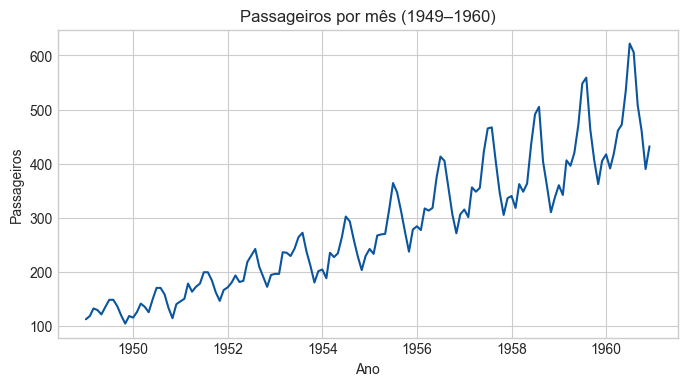

In [3]:
plt.figure(figsize=(8,4))
plt.plot(df['date'], df['passengers'])
plt.title('Passageiros por mês (1949–1960)')
plt.xlabel('Ano')
plt.ylabel('Passageiros')
plt.grid(True)
plt.show()

### Interpretação inicial
Observa-se uma tendência de crescimento ao longo do tempo, mas sem uma leitura narrativa, o gráfico parece apenas uma série temporal comum.
A ausência de ênfase dificulta a percepção dos principais marcos do fenômeno.

## 3. Mostrando e contando - lado a lado
Agora, vamos comparar a visualização fria com uma versão narrativa que destaca o insight principal.

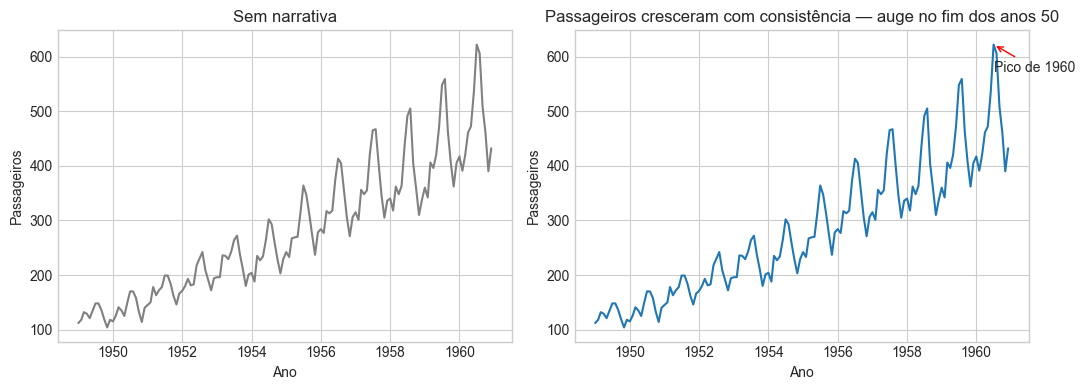

In [4]:
# Identificar pico
idx_max = df['passengers'].idxmax()
x_peak = df.loc[idx_max, 'date']
y_peak = df.loc[idx_max, 'passengers']

fig, axs = plt.subplots(1, 2, figsize=(11,4))

# Gráfico neutro
axs[0].plot(df['date'], df['passengers'], color='gray')
axs[0].set_title('Sem narrativa')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Passageiros')

# Gráfico narrativo
axs[1].plot(df['date'], df['passengers'], color='tab:blue')
axs[1].set_title('Passageiros cresceram com consistência — auge no fim dos anos 50')
axs[1].annotate('Pico de 1960', xy=(x_peak, y_peak), xytext=(x_peak, y_peak-50),
                arrowprops=dict(arrowstyle='->', color='red'))
axs[1].set_xlabel('Ano')
axs[1].set_ylabel('Passageiros')

plt.tight_layout()
plt.show()

### Interpretação
A diferença é clara: quando o gráfico recebe uma frase narrativa e um destaque visual, o olhar do público é guiado diretamente para o ponto principal da história - o auge do crescimento em 1960.

## 4. Adicionando contexto e destaque visual
O storytelling depende de ênfase visual e contextualização. É isso que transforma um gráfico técnico em uma narrativa persuasiva.

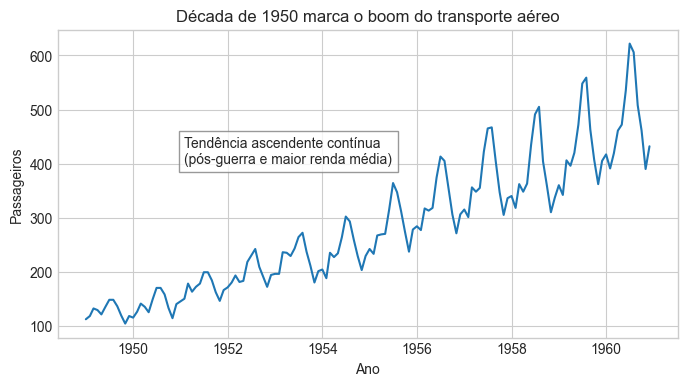

In [12]:
plt.figure(figsize=(8,4))
plt.plot(df['date'], df['passengers'], color='tab:blue')
plt.title('Década de 1950 marca o boom do transporte aéreo', fontsize=12)
plt.xlabel('Ano')
plt.ylabel('Passageiros')
plt.text(df['date'].iloc[25], 400, 'Tendência ascendente contínua\n(pós-guerra e maior renda média)',
         fontsize=10, bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8))
plt.grid(True)
plt.show()

### Interpretação
A anotação acrescenta contexto econômico e histórico, permitindo que o público compreenda o porquê do padrão observado, não apenas o que ocorreu.

## 5. Tendência - média móvel de 12 meses

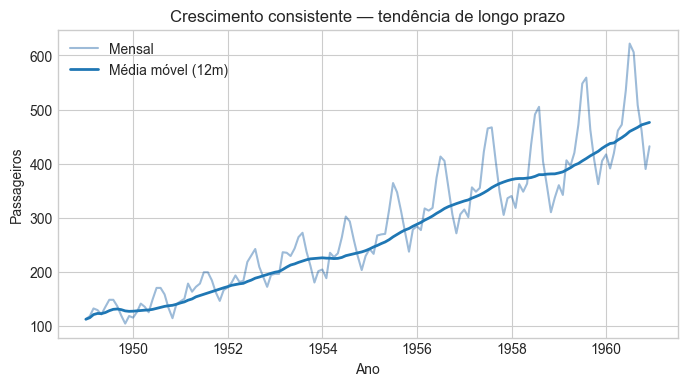

In [6]:
df['ma12'] = df['passengers'].rolling(12, min_periods=1).mean()

plt.figure(figsize=(8,4))
plt.plot(df['date'], df['passengers'], alpha=0.4, label='Mensal')
plt.plot(df['date'], df['ma12'], color='tab:blue', linewidth=2, label='Média móvel (12m)')
plt.title('Crescimento consistente — tendência de longo prazo')
plt.xlabel('Ano')
plt.ylabel('Passageiros')
plt.legend()
plt.grid(True)
plt.show()

### Interpretação
A média móvel suaviza as flutuações e revela uma tendência ascendente clara, evidenciando o crescimento contínuo do transporte aéreo.

## 5.1. Sazonalidade - meses com maior movimento

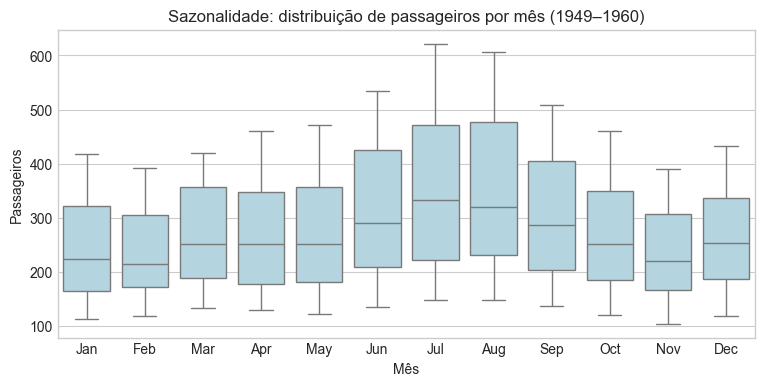

In [7]:
plt.figure(figsize=(9,4))
sns.boxplot(data=df, x='month', y='passengers', color='lightblue', showfliers=False)
plt.title('Sazonalidade: distribuição de passageiros por mês (1949–1960)')
plt.xlabel('Mês')
plt.ylabel('Passageiros')
plt.grid(True, axis='y')
plt.show()

### Insight
Os meses de julho e agosto concentram os maiores volumes de passageiros, mostrando um padrão de alta sazonalidade. Essa informação é crucial para planejamento operacional e estratégico.

## Conclusão - costurando a história

Contexto: crescimento econômico e democratização do transporte aéreo.  
Descoberta: aumento constante e sazonalidade evidente.  
Insight: os meses de verão concentram mais passageiros; o crescimento é sustentado.  
Ação: planejar capacidade e promoções em períodos de pico.